In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import statistics as sts
import lmfit
from lmfit import Model
from scipy.stats import sem
from matplotlib import markers
import seaborn as sns

# Linear Fit
def line(x, m, b):
    return x * m + b
gmodel = Model(line)
param1 = gmodel.make_params(m = 1, b = 1)
param1['m'].set(min = 0)

colors = {'Pt' : 'tab:blue',
          'Al' : 'tab:orange', 
          'Mo' : 'tab:green',
          'Cr' : 'tab:red'}

# Function
def r_t(s, r_s, l_t, N, W, L):
    return (r_s * s / (N * W + (N-1) * (2 *s + L))) + (2 * r_s * l_t / (N * W + (N-1) * (2 *s + L)))

# Variables
metals = ['Pt', 'Al', 'Mo', 'Cr']
markers = ['^', 'v', 'D', 's']
w = 60 * 5e-4 + 59 * 3200e-4

#Create model and parameters
gmodel5 = Model(r_t)
param5 = gmodel5.make_params()
param5['r_s'].set(value = 1e10, min = 0)
param5['l_t'].set(value = 1, min = 0)
param5['L'].set(value = 3200e-4, vary = False)
param5['W'].set(value = 5e-4, vary = False)
param5['N'].set(value = 60, vary = False)

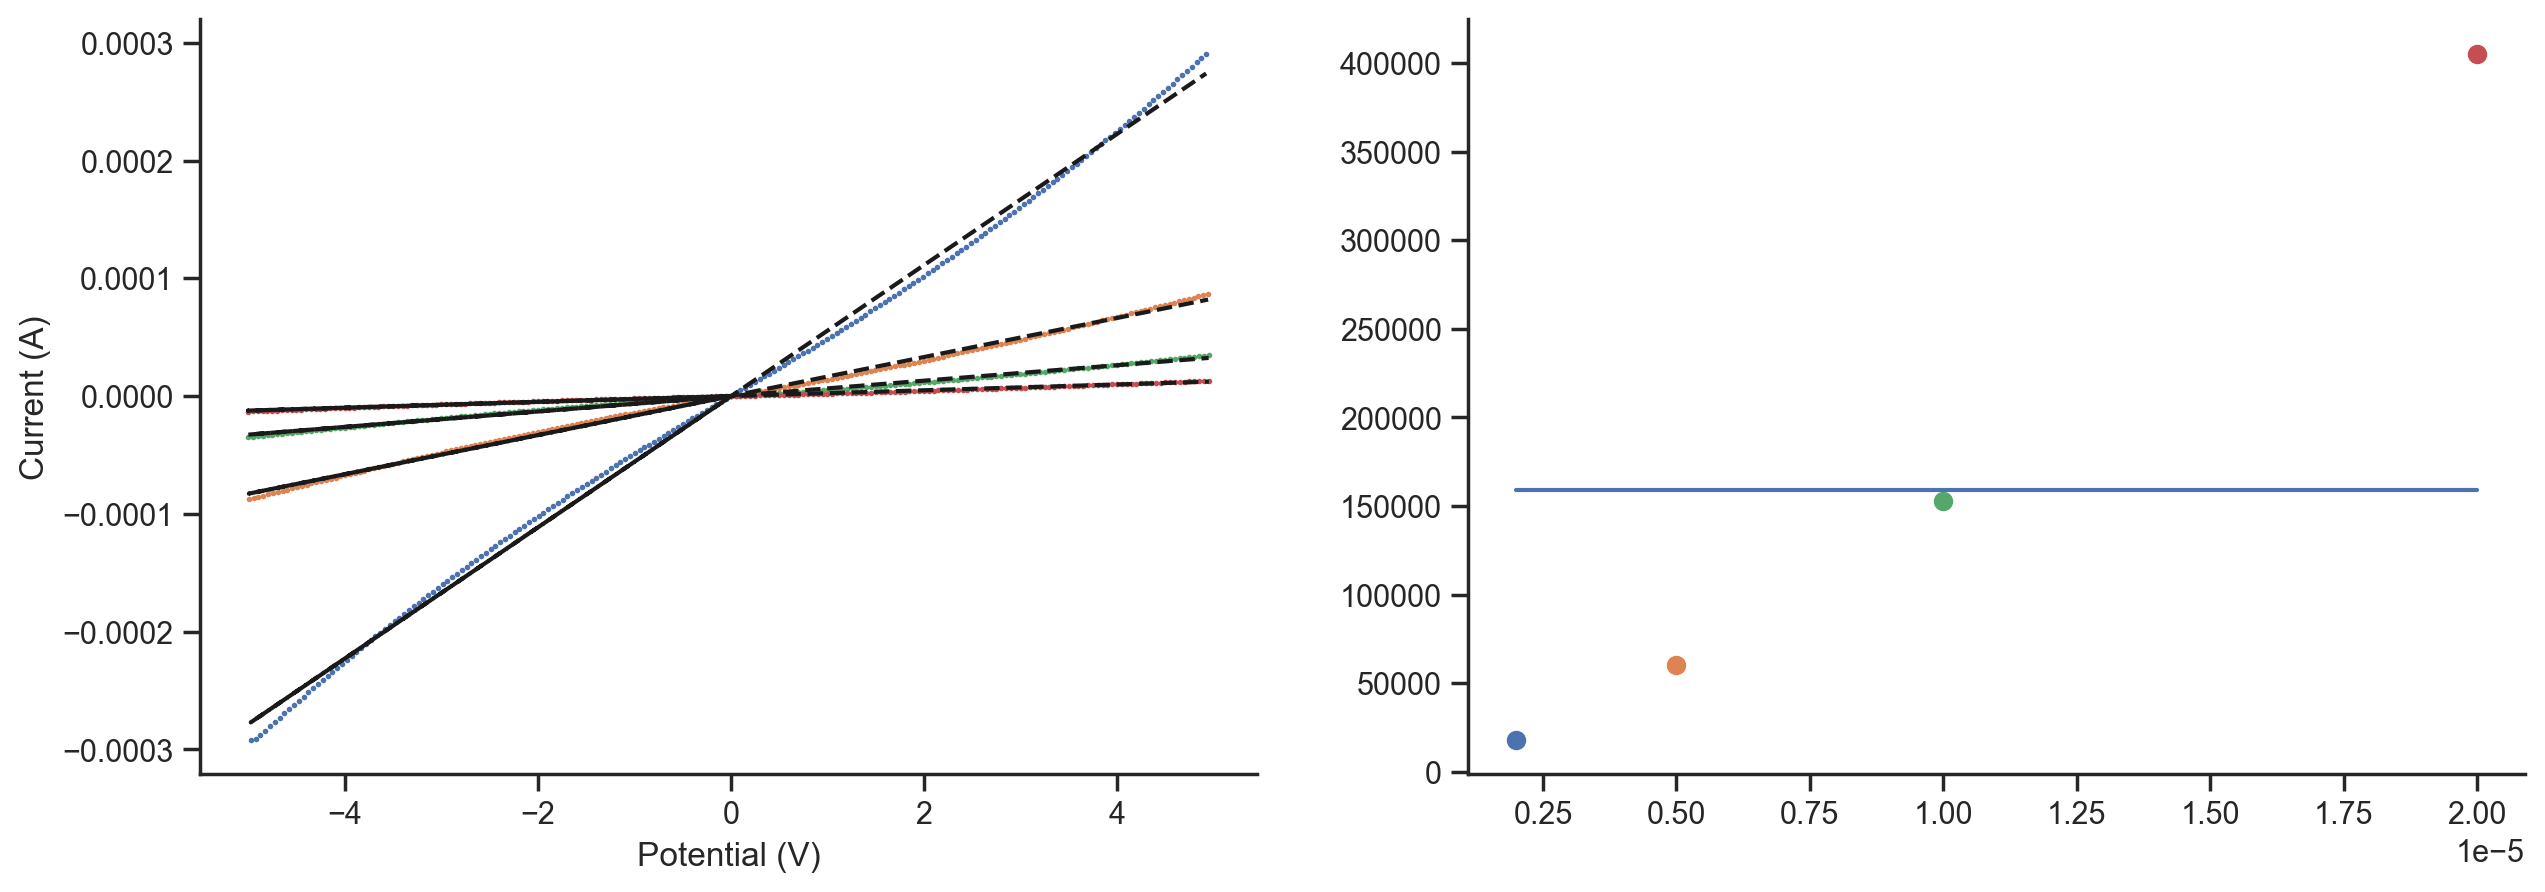

In [2]:
#Settings
sns.set_theme(style="ticks")
dpi = 200
s = np.array([2, 5, 10, 20]) *1e-6
r = []

#Load file
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\LCR\0G_18'
files = [os.path.join(path, i) for i in os.listdir(path)]

#Make plot of I-V
fig, ax = plt.subplots(facecolor = 'white', dpi = dpi, ncols = 2, figsize = (15,5))
ax[0].set_ylabel('Current (A)')
ax[0].set_xlabel('Potential (V)')

sns.despine()

n = 0
for i in files:
    df = pd.read_csv(i)
    linear_fit = gmodel.fit(df['Idc'], param1, x = df['Vds'])
    #print(linear_fit.fit_report())
    ax[0].scatter(df['Vds'], df['Idc'], s = 1)
    ax[0].plot(df['Vds'], linear_fit.best_fit, 'k--')
    ax[1].scatter(s[n], 1/linear_fit.values['m'])
    r.append(1/linear_fit.values['m'])
    n += 1


# result = gmodel5.fit(r, param5, s = s)
result = gmodel.fit(r, param1, x = s)
ax[1].plot(s, result.best_fit)
# # print(result.fit_report())
#rs = result.values['r_s']
#sigma = 1/  (rs * 0.18e-4)
#print('{:.4e}'.format(sigma))

#rc_2 = gmodel5.eval(result.params, s = 0) # 2 times contact resistance
#print(rc_2 / 2)
